# Import Libraries

In [355]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
from matplotlib import dates as mpl_dates
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

In [303]:
df = pd.read_csv('BTC_Tweets.csv')
df.head()

C:\Users\JOSEP\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


# Data Wrangling

In [304]:
df.shape

(1751675, 13)

Check duplicated rows

In [305]:
df.duplicated().value_counts()
#Locate multiple duplicated col values
#df.duplicated(subset=['user_location', 'user_created', 'user_verified'])

False    1751671
True           4
dtype: int64

Alternative

In [5]:
len(df[df.duplicated()])

4

In [6]:
#negation
(~df.duplicated()).sum()

1751671

Extracting duplicate rows with loc

In [306]:
#Source https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f
df.loc[df.duplicated(), :]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
1694990,smart.algoss,NaN,#️⃣ 1️⃣ trading network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1694991,🤖 unique crypto trading robots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1710879,smart.algoss,NaN,#️⃣ 1️⃣ trading network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1710880,🤖 unique crypto trading robots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping duplicate rows

In [311]:
df = df.drop_duplicates()
#Drop duplicates from original source
#df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    1751671
dtype: int64

## Drop NaN values

In [312]:
df.isna().sum()

user_name               27
user_location       843310
user_description    206836
user_created            22
user_followers          42
user_friends            42
user_favourites         42
user_verified           42
date                    42
text                    42
hashtags             16999
source                3569
is_retweet             255
dtype: int64

Back up of NaN rows

In [313]:
nan_df=df[df.isna().any(axis=1)]
nan_df.shape

(892229, 13)

In [314]:
df['date'].isna().value_counts()
#df.loc[df.isna(), :]
#df = df[''].dropna()

False    1751629
True          42
Name: date, dtype: int64

Drop NaN rows in 'date' col


In [315]:
#Source https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python
df.dropna(subset=['date'], inplace=True)
df['date'].isna().value_counts()

False    1751629
Name: date, dtype: int64

In [316]:
df.isna().sum()

user_name               27
user_location       843288
user_description    206817
user_created             0
user_followers           0
user_friends             0
user_favourites          0
user_verified            0
date                     0
text                     0
hashtags             16957
source                3527
is_retweet             213
dtype: int64

In [317]:
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [318]:
df.sort_values(by=['user_followers'], ascending=False)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
360518,Reuters,Around the world,"Top and breaking news, pictures and videos fro...",2007-03-20 17:46:05,23597283.0,1167.0,755.0,True,2021-07-23 15:34:38,Japanese tennis star Naomi Osaka lights the #O...,"['OlympicGames', 'Tokyo2020']",Twitter Web App,False
358521,Reuters,Around the world,"Top and breaking news, pictures and videos fro...",2007-03-20 17:46:05,23597270.0,1167.0,755.0,True,2021-07-23 21:13:40,With typhoon season around the corner for Toky...,['OlympicGames'],SocialFlow,False
187221,Reuters,Around the world,"Top and breaking news, pictures and videos fro...",2007-03-20 17:46:05,23494917.0,1168,754,True,2021-06-22 11:20:05,"#Bitcoin regained some ground, a day after tou...",['Bitcoin'],SocialFlow,False
1126917,Forbes,"New York, NY","Official account of Forbes, the world’s leadin...",2009-11-21 02:09:57,17006282.0,5166.0,10200.0,True,2021-08-25 14:37:47,Chelsea Manning is back and has her sights set...,['Bitcoin'],SocialFlow,False
1118364,Forbes,"New York, NY","Official account of Forbes, the world’s leadin...",2009-11-21 02:09:57,17006200.0,5166.0,10200.0,True,2021-08-25 19:07:34,Chelsea Manning is back and has her sights set...,['Bitcoin'],SocialFlow,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443212,Akash rai,NaN,NaN,2021-06-29 19:37:37,0.0,1.0,0.0,False,2021-07-22 02:33:04,i am in love with #crypto 😍😍 #bitcoin #etherum...,"['crypto', 'bitcoin', 'etherum', 'dogecoin', '...",Twitter for Android,False
1310733,Fetro Agg,Sweden,"""My passion is for you to become the best vers...",2021-07-31 18:25:50,0.0,0.0,1.0,False,2021-10-19 15:20:52,Do you want to retire early and get rich with ...,"['etherium', 'ETH', 'BNB', 'BTC']",Twitter Web App,False
1036824,Alts_Millionaire,NaN,Self made millionaire finding and trading alts...,2021-08-19 13:47:17,0.0,0.0,0.0,False,2021-08-19 15:23:59,Once I get followers I'll start sharing my cur...,"['crypto', 'XRP', 'BTC', 'ETH', 'DeFi']",Twitter Web App,False
156539,Heir Cryptonaire,NaN,NaN,2021-03-04 14:35:36,0.0,0,77,False,2021-06-23 00:59:00,#Bitcoin #Ethereum #SOLANA #ATOM #BNB #FTT You...,"['Bitcoin', 'Ethereum', 'SOLANA', 'ATOM', 'BNB...",Twitter for iPhone,False


Data type error: ValueError: could not convert string to float: 'False'


We can't convert 'user_friends' type from object to float64 because there are some string values

In [16]:
#df['user_friends'] = df['user_friends'].astype('float64')
#df.dtypes

There are some 'False' values in column 'user_friends'

In [319]:
#df.loc[df['user_friends'] == 'False', :].sort_values(by='user_friends', ascending=False)
#df.loc[df['user_friends'] == 'False', :].value_counts()
(df['user_friends']=='False').sum()

12

In [320]:
df.loc[df['user_friends'] == 'False', :]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
64943,Can roam the world，It's nine to five againᵕᴗᵕ)...,2020-11-09 19:44:24,9,141,36.0,False,2021-04-07 16:23:03,@krakenfx #ETH #BTC If you want to become po...,"['ETH', 'BTC', 'Bitcoin']",Twitter Web App,False,NaN,NaN
137068,*Muhammad Yasir* hello stalker nice to tweet ...,2009-08-31 07:40:42,280.0,623,499.0,False,2021-06-23 14:51:12,Official ESHOP Airdrop. If You Missed Meme Tok...,"['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum...",Twitter for Android,False,NaN,NaN
180575,• Learn n To Do d'Best...!!!!!!!!,2010-08-16 10:55:09,52.0,277,127.0,False,2021-06-22 13:31:16,@pufferswap Nice project\n\n@karnoto_hendrik \...,"['YieldFarming', 'Airdrop', 'Binance', 'Bitcoi...",Twitter Web App,False,NaN,NaN
693194,FB- Xiomara Castañeda,2015-12-21 18:17:12,9.0,81,531.0,False,2021-07-26 11:54:15,#btc to the moon 🚀🚀 77774,['btc'],Twitter Web App,False,NaN,NaN
697397,Pin bb : 26ea62f8 . Line : baliratih_bali,2012-06-01 01:08:25,4.0,110,21.0,False,2021-07-26 11:48:46,#btc to the moon 🚀🚀 46059,['btc'],Twitter Web App,False,NaN,NaN
1067665,YOU'LL NEVER WALK ALONE,2012-08-29 10:32:29,71.0,314,1968.0,False,2021-08-16 16:39:27,@DogCakeFinance @DogCakeFinance Great project\...,"['YieldFarming', 'Airdrop', 'PancakeSwap', 'Gi...",Twitter for Android,False,NaN,NaN
1347699,amp=l,2013-01-02 07:40:53,9.0,33,0.0,False,2021-10-22 21:33:06,@bloodgoodBTC5\n\n#Bitcoin \n\nShort term tr...,['Bitcoin'],Twitter for iPhone,False,NaN,NaN
1393938,💰 based on the latest AI innovations,2021-03-31 11:02:58,4.0,26,0.0,False,2021-10-21 18:12:08,🤯Mind-blowing 99.7% of all Bitcoin holders are...,"['cryptotrading', 'crypto', 'tradingbots', 'bi...",Twitter for iPhone,False,NaN,NaN
1513853,My_Facebook http://t.co/tof8V41sTA,2012-08-24 20:37:55,285.0,933,389.0,False,2021-10-29 08:22:59,@pythonwealth Good Project 🎉🎉🎉🎉\n\n@nurull_pad...,"['PW', 'pythonwealth', 'Presale', 'token', 'ic...",Twitter Web App,False,NaN,NaN
1611513,https://t.co/atJqp3g7I2,2014-11-16 20:10:32,2.0,32,20.0,False,2021-11-06 04:05:58,@iftikharpost the world is flat #bitcoin 💪,['bitcoin'],Twitter for iPhone,False,NaN,NaN


In [321]:
df['user_friends'].str.isnumeric().value_counts()

True     540305
False     97212
Name: user_friends, dtype: int64

In [322]:
#bad_rows = df['user_friends'].apply(lambda x: 0 if x.str.isnumeric()==False or x.str.isnumeric() == 'NaN' else 1)
#bad_rows = df['user_friends'].str.isnumeric()
#bad_rows.value_counts()

#df.applymap(lambda x: isinstance(x['user_friends'], (int, float)))
df["user_friends"].apply(np.isreal)

0          False
1          False
2          False
3          False
4          False
           ...  
1751670    False
1751671    False
1751672    False
1751673    False
1751674    False
Name: user_friends, Length: 1751629, dtype: bool

Convert to numeric using 'coerce' which fills bad values with 'nan' in a new column just to compare both columns

In [323]:
df['user_friends_numeric'] = pd.to_numeric(df['user_friends'], errors='coerce')
df.loc[df['user_friends_numeric'].isna(), :]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,user_friends_numeric
64943,Can roam the world，It's nine to five againᵕᴗᵕ)...,2020-11-09 19:44:24,9,141,36.0,False,2021-04-07 16:23:03,@krakenfx #ETH #BTC If you want to become po...,"['ETH', 'BTC', 'Bitcoin']",Twitter Web App,False,NaN,NaN,NaN
137068,*Muhammad Yasir* hello stalker nice to tweet ...,2009-08-31 07:40:42,280.0,623,499.0,False,2021-06-23 14:51:12,Official ESHOP Airdrop. If You Missed Meme Tok...,"['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum...",Twitter for Android,False,NaN,NaN,NaN
180575,• Learn n To Do d'Best...!!!!!!!!,2010-08-16 10:55:09,52.0,277,127.0,False,2021-06-22 13:31:16,@pufferswap Nice project\n\n@karnoto_hendrik \...,"['YieldFarming', 'Airdrop', 'Binance', 'Bitcoi...",Twitter Web App,False,NaN,NaN,NaN
693194,FB- Xiomara Castañeda,2015-12-21 18:17:12,9.0,81,531.0,False,2021-07-26 11:54:15,#btc to the moon 🚀🚀 77774,['btc'],Twitter Web App,False,NaN,NaN,NaN
697397,Pin bb : 26ea62f8 . Line : baliratih_bali,2012-06-01 01:08:25,4.0,110,21.0,False,2021-07-26 11:48:46,#btc to the moon 🚀🚀 46059,['btc'],Twitter Web App,False,NaN,NaN,NaN
1067665,YOU'LL NEVER WALK ALONE,2012-08-29 10:32:29,71.0,314,1968.0,False,2021-08-16 16:39:27,@DogCakeFinance @DogCakeFinance Great project\...,"['YieldFarming', 'Airdrop', 'PancakeSwap', 'Gi...",Twitter for Android,False,NaN,NaN,NaN
1347699,amp=l,2013-01-02 07:40:53,9.0,33,0.0,False,2021-10-22 21:33:06,@bloodgoodBTC5\n\n#Bitcoin \n\nShort term tr...,['Bitcoin'],Twitter for iPhone,False,NaN,NaN,NaN
1393938,💰 based on the latest AI innovations,2021-03-31 11:02:58,4.0,26,0.0,False,2021-10-21 18:12:08,🤯Mind-blowing 99.7% of all Bitcoin holders are...,"['cryptotrading', 'crypto', 'tradingbots', 'bi...",Twitter for iPhone,False,NaN,NaN,NaN
1513853,My_Facebook http://t.co/tof8V41sTA,2012-08-24 20:37:55,285.0,933,389.0,False,2021-10-29 08:22:59,@pythonwealth Good Project 🎉🎉🎉🎉\n\n@nurull_pad...,"['PW', 'pythonwealth', 'Presale', 'token', 'ic...",Twitter Web App,False,NaN,NaN,NaN
1611513,https://t.co/atJqp3g7I2,2014-11-16 20:10:32,2.0,32,20.0,False,2021-11-06 04:05:58,@iftikharpost the world is flat #bitcoin 💪,['bitcoin'],Twitter for iPhone,False,NaN,NaN,NaN


In [324]:
df['user_friends_numeric'].isna().value_counts()

False    1751617
True          12
Name: user_friends_numeric, dtype: int64

Eliminate invalid data from dataframe with column 'user_friends_numeric'

In [325]:
df = df.dropna(subset=['user_friends_numeric'])
df['user_friends_numeric'].isna().value_counts()

False    1751617
Name: user_friends_numeric, dtype: int64

In [326]:
df['user_friends'] = df['user_friends'].astype('float64')

In [327]:
df = df.drop('user_friends_numeric', 1)
df.head()

<ipython-input-327-444d2a7b2af6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('user_friends_numeric', 1)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129.0,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [328]:
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends        float64
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [329]:
df['user_favourites'] = df['user_favourites'].astype('float64')
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [331]:
df['user_verified'] = df['user_verified'].astype('bool')
df['is_retweet'] = df['is_retweet'].astype('bool')
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified          bool
date                 object
text                 object
hashtags             object
source               object
is_retweet             bool
dtype: object

In [332]:
df['date'] = pd.to_datetime(df.date)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,True,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,True,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129.0,14.0,True,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,True,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [334]:
df.dtypes

user_name                   object
user_location               object
user_description            object
user_created                object
user_followers             float64
user_friends               float64
user_favourites            float64
user_verified                 bool
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
is_retweet                    bool
dtype: object

In [335]:
df['Timestamp'] = df['date'].values.astype(np.int64)
df['Timestamp'] = df['Timestamp']/1000000000
df['Timestamp'] = df['Timestamp'].astype(np.int64)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Timestamp
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,1613001544
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,True,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,1613001528
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,True,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,1613001288
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129.0,14.0,True,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,1613001273
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,True,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,1613001246


In [336]:
df.dtypes

user_name                   object
user_location               object
user_description            object
user_created                object
user_followers             float64
user_friends               float64
user_favourites            float64
user_verified                 bool
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
is_retweet                    bool
Timestamp                    int64
dtype: object

In [411]:
#df['day'] = df['date'].apply(lambda x: x.date())
df['date'] = pd.to_datetime(df.date)
df['day'] = df['date'].dt.date
df['day'] = df['day'].astype(str)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Timestamp,day,tweets
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,1613001544,2021-02-10,3526
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,True,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,1613001528,2021-02-10,3526
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,True,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,1613001288,2021-02-10,3526
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129.0,14.0,True,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,1613001273,2021-02-10,3526
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,True,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,1613001246,2021-02-10,3526


In [338]:
df.dtypes

user_name                   object
user_location               object
user_description            object
user_created                object
user_followers             float64
user_friends               float64
user_favourites            float64
user_verified                 bool
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
is_retweet                    bool
Timestamp                    int64
day                         object
dtype: object

Calculating the sum of daily tweets

In [343]:
df['day'].value_counts()

2021-10-19    63590
2021-10-22    54775
2021-08-09    53501
2021-08-25    47043
2021-06-22    45840
              ...  
2021-02-05     1694
2021-02-28     1634
2021-07-16     1110
2021-04-17      333
2021-03-11      217
Name: day, Length: 92, dtype: int64

Performance before lambda function:

It seems that sending x = '2021-10-19' in df['day'].value_counts()[x] with a lambda function will take too long considering that the dataset have 1751617 rows. 

In [360]:
%%timeit -n 10
df['day'].value_counts()['2021-10-19']

124 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Using a dictionary to translate every day with the tweets sum()

In [361]:
df_dic = df['day'].value_counts().rename_axis('day').to_frame('counts')
df_dic.reset_index(level=0, inplace=True)
df_dic.head()

,day,counts
0,2021-10-19,63590
1,2021-10-22,54775
2,2021-08-09,53501
3,2021-08-25,47043
4,2021-06-22,45840


In [366]:
daily_tweets = df_dic.set_index('day')['counts'].to_dict()
dict(list(daily_tweets.items())[:3])

{'2021-10-19': 63590, '2021-10-22': 54775, '2021-08-09': 53501}

In [394]:
df['tweets'] = df['day']
#df['day']=df['date'].dt.date
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Timestamp,day,tweets
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,1613001544,2021-02-10,2021-02-10
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,True,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,1613001528,2021-02-10,2021-02-10
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,True,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,1613001288,2021-02-10,2021-02-10
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129.0,14.0,True,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,1613001273,2021-02-10,2021-02-10
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,True,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,1613001246,2021-02-10,2021-02-10


Using replace to translate

In [372]:
%%timeit -n 1
df.replace({"tweets": daily_tweets})

6.54 s ± 72.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Using map to translate is the fastest method

In [373]:
%%timeit -n 1
df['tweets'].map(daily_tweets)

113 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [408]:
df['tweets'] = df['tweets'].map(daily_tweets)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Timestamp,day,tweets
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,1613001544,2021-02-10,3526
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,True,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,1613001528,2021-02-10,3526
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,True,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,1613001288,2021-02-10,3526
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129.0,14.0,True,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,1613001273,2021-02-10,3526
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,True,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,1613001246,2021-02-10,3526


In [412]:
df['day'].value_counts()['2021-10-19']

63590

In [382]:
df['day'].value_counts()['2021-02-10']

3526

In [283]:
df['day'].value_counts()['2021-02-06']

3278

In [407]:
#df['tweets'] = df['tweets'].astype('int64')
#df.dtypes
df['tweets'].value_counts()

2021-10-19    63590
2021-10-22    54775
2021-08-09    53501
2021-08-25    47043
2021-06-22    45840
              ...  
2021-02-05     1694
2021-02-28     1634
2021-07-16     1110
2021-04-17      333
2021-03-11      217
Name: tweets, Length: 92, dtype: int64

In [410]:
df.dtypes

user_name                   object
user_location               object
user_description            object
user_created                object
user_followers             float64
user_friends               float64
user_favourites            float64
user_verified                 bool
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
is_retweet                    bool
Timestamp                    int64
day                         object
tweets                       int64
dtype: object

# Data Visualization

In [384]:
def plot_df(df, x, y, title='', xlabel='', ylabel='', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

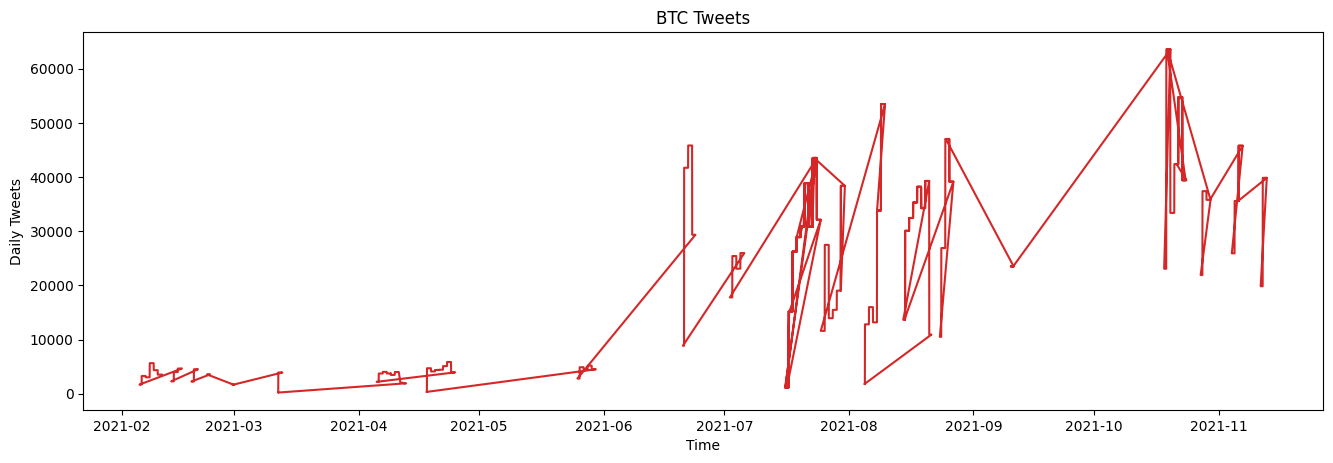

In [385]:
plot_df(df, x=df.date, y=df.tweets, title='BTC Tweets', xlabel='Time', ylabel='Daily Tweets')

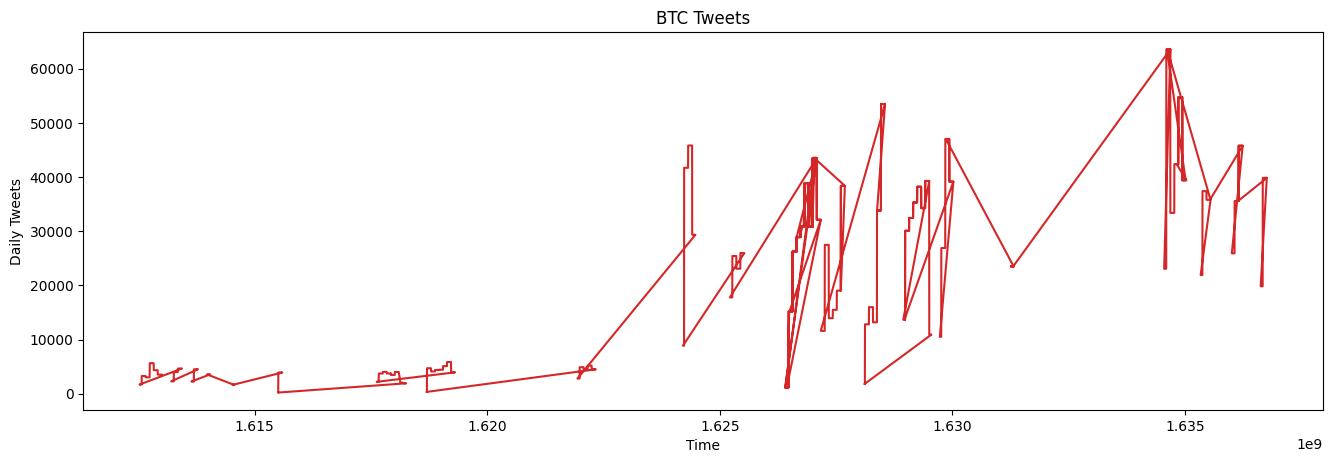

In [413]:
plot_df(df, x=df.Timestamp, y=df.tweets, title='BTC Tweets', xlabel='Time', ylabel='Daily Tweets')

### Checking where is the problem in my plots

In [ ]:
df_history = pd.read_csv('D:\DataScience\projects\Bitcoin\Bitcoin History\BTC_History_Cleaned.csv')
df_history.head()

In [390]:
df_old = pd.read_csv('BTC_Tweets.csv')
df_old.head()

C:\Users\JOSEP\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [393]:
#df['user_friends_numeric'] = pd.to_numeric(df['user_friends'], errors='coerce')
#df.loc[df['user_friends_numeric'].isna(), :]

df_old['date'] = pd.to_datetime(df_old.date, errors='coerce')
df_old['day'] = df_old['date'].dt.date
df_old['day'] = df_old['day'].astype(str)
df_old.head()
#f_old.apply(lambda x: df_old['date'])


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,day
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,2021-02-10
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,2021-02-10
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,2021-02-10
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,2021-02-10
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,2021-02-10


In [399]:
df_old['has_tweet'] = df_old.apply(lambda x: 1, axis=1)
df_old.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,day,has_tweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,2021-02-10,1
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,2021-02-10,1
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,2021-02-10,1
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,2021-02-10,1
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,2021-02-10,1


In [400]:
df_old.dropna(subset=['date'], inplace=True)
df_old['date'].isna().value_counts()

False    1751617
Name: date, dtype: int64

### This time I will use seaborn and check if there is a problem with the dates

Plotting tweets vs date with old dataset

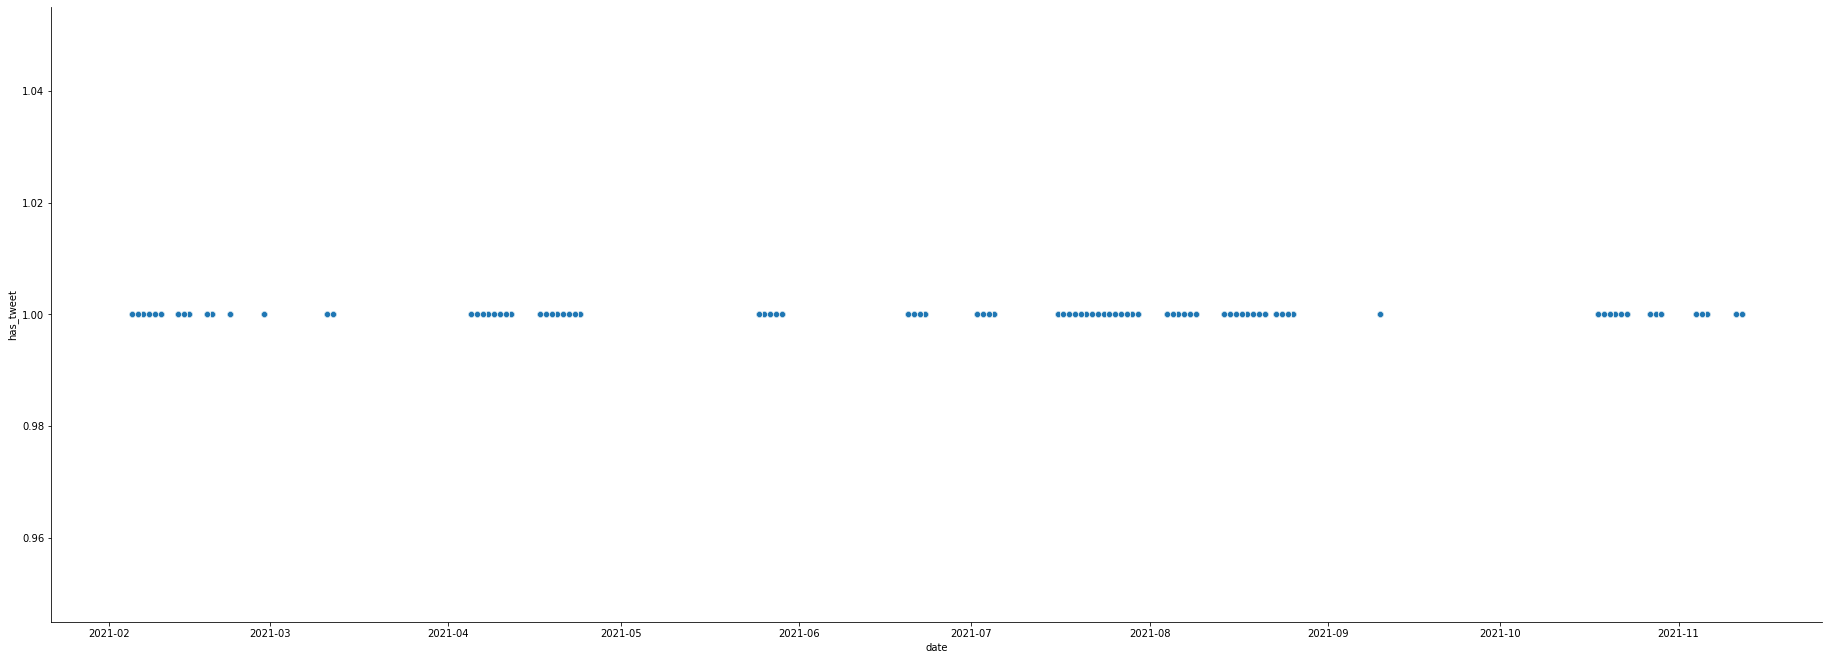

In [426]:
sns.relplot(x= df_old['date'].dt.date, y='has_tweet',  data= df_old).figure.set_size_inches(30,10)

Plotting tweet count vs date with cleaned dataset

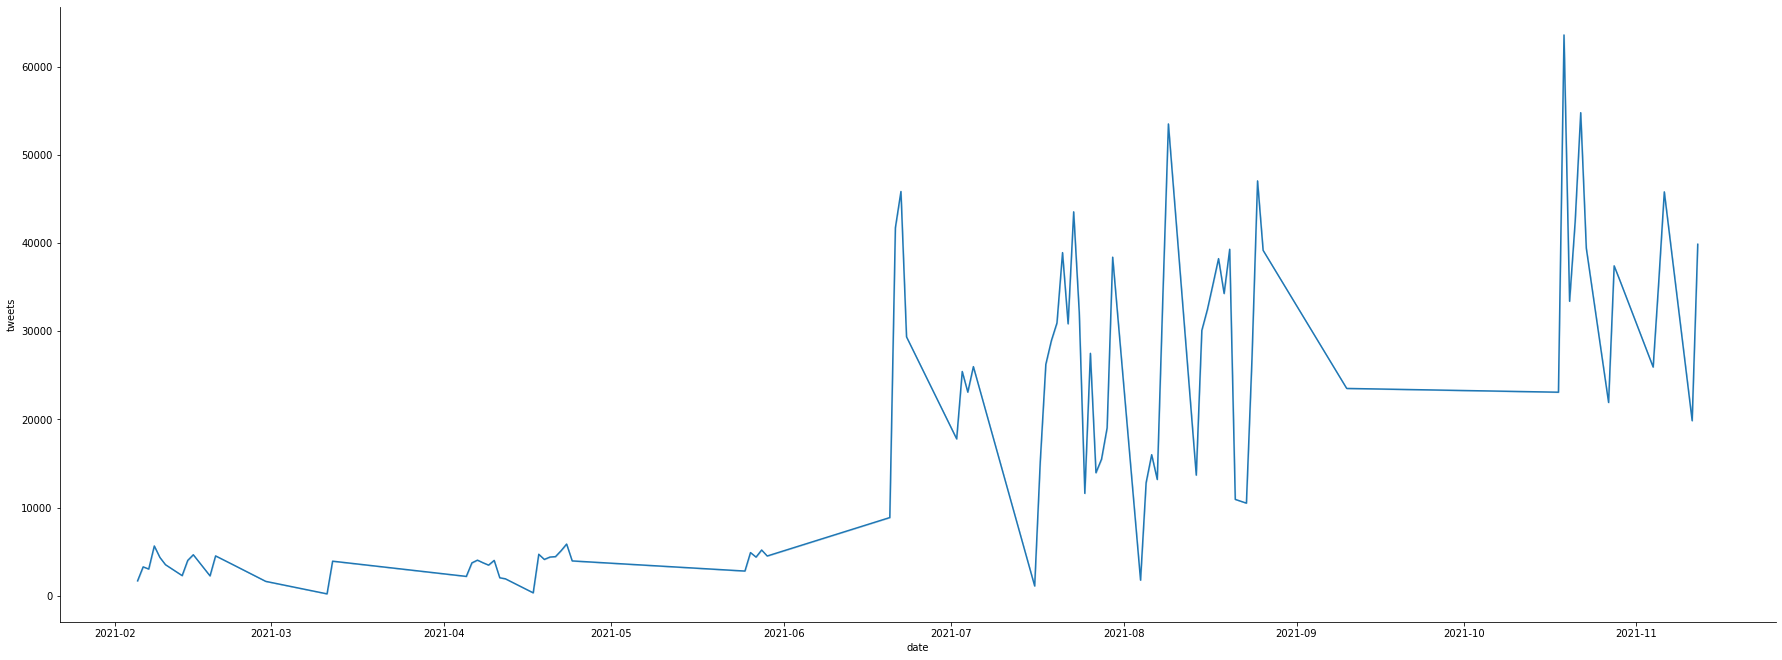

In [429]:
sns.relplot(x= df['date'].dt.date, y='tweets', kind='line', data= df).figure.set_size_inches(30,10)

Comparing data from both datasets just to check if I did something wrong with the null values

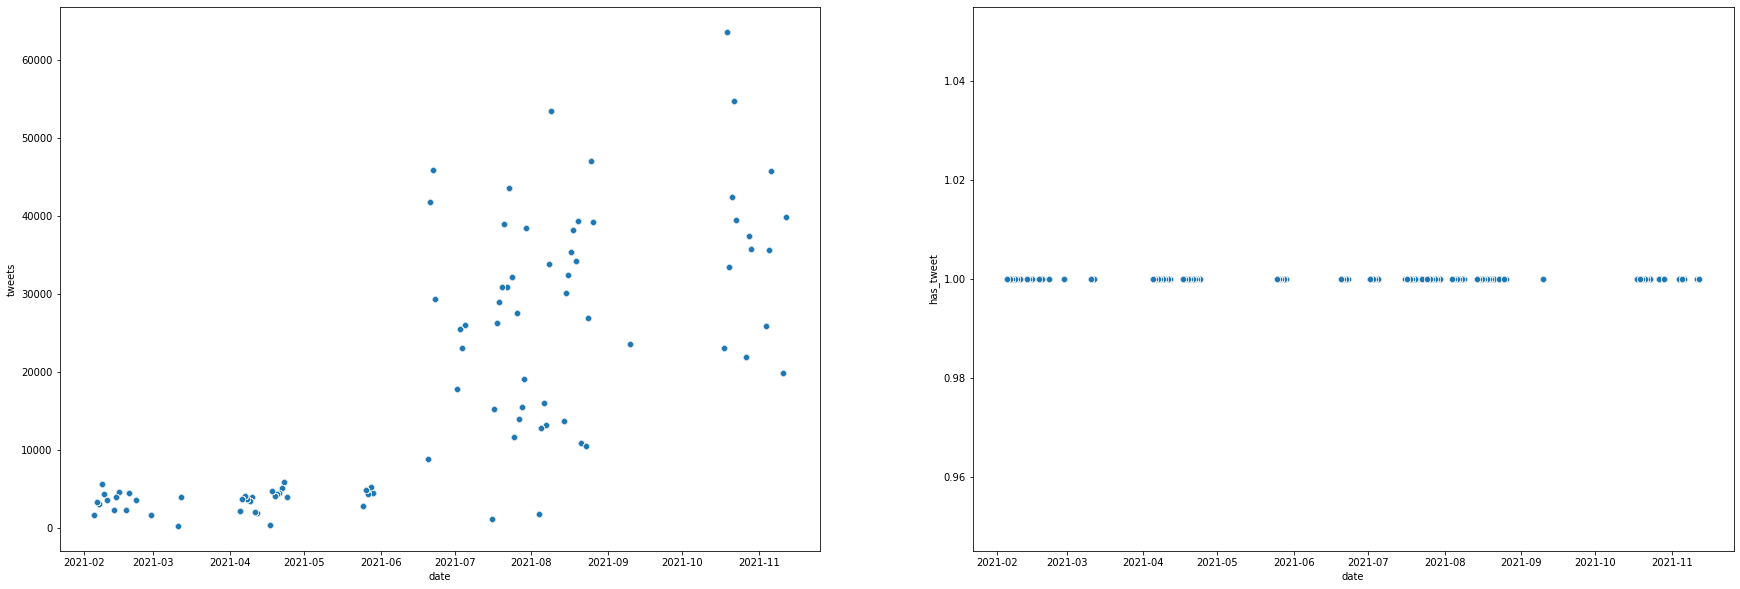

In [435]:
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(x= df['date'].dt.date, y='tweets', data= df, ax=axs[0]).figure.set_size_inches(30,10)
sns.scatterplot(x= df_old['date'].dt.date, y='has_tweet',  data= df_old, ax=axs[1]).figure.set_size_inches(30,10)

<AxesSubplot:xlabel='date', ylabel='tweets'>

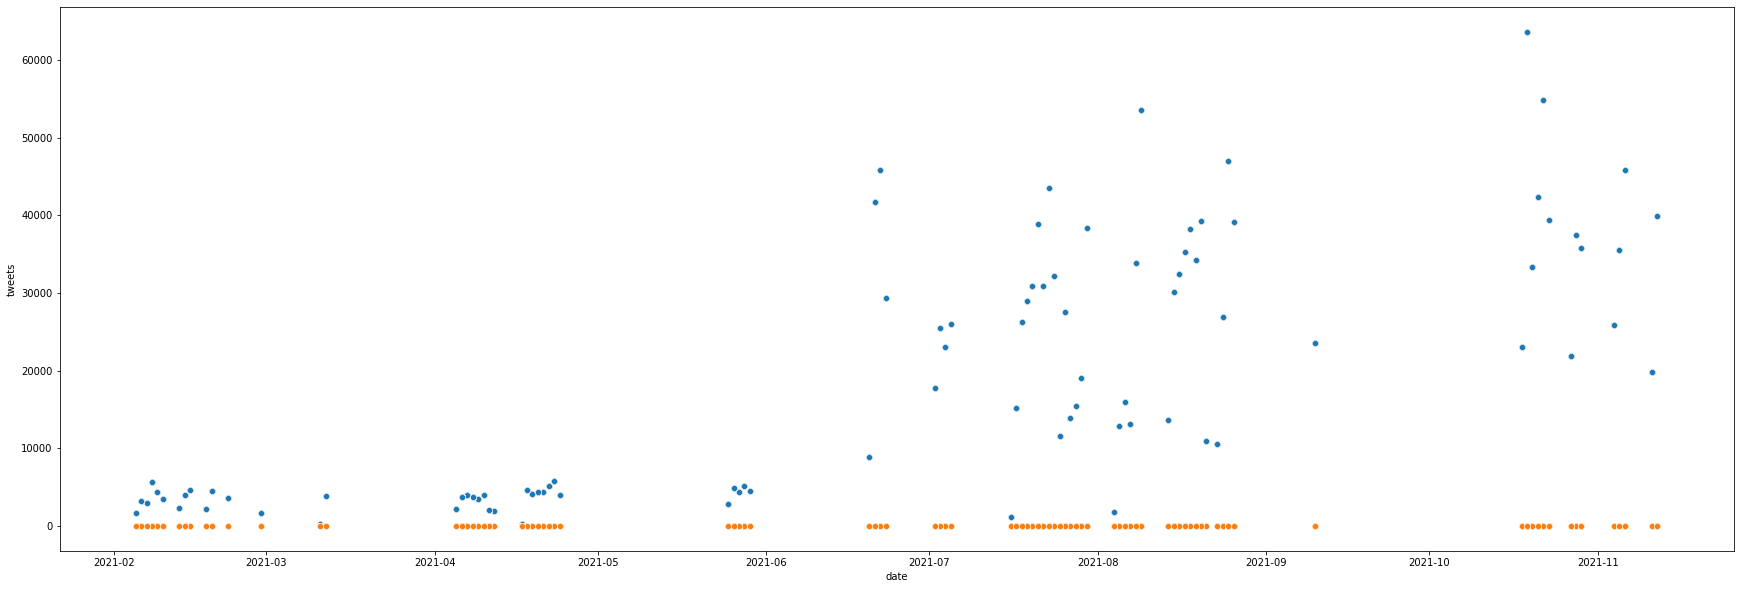

In [450]:
fig, axs = plt.subplots(1, 1, sharex=True, figsize=(30,10))
ax = sns.scatterplot(x= df['date'].dt.date, y='tweets', data= df)
sns.scatterplot(x= df_old['date'].dt.date, y='has_tweet',  data= df_old, ax=ax)

<AxesSubplot:xlabel='date', ylabel='tweets'>

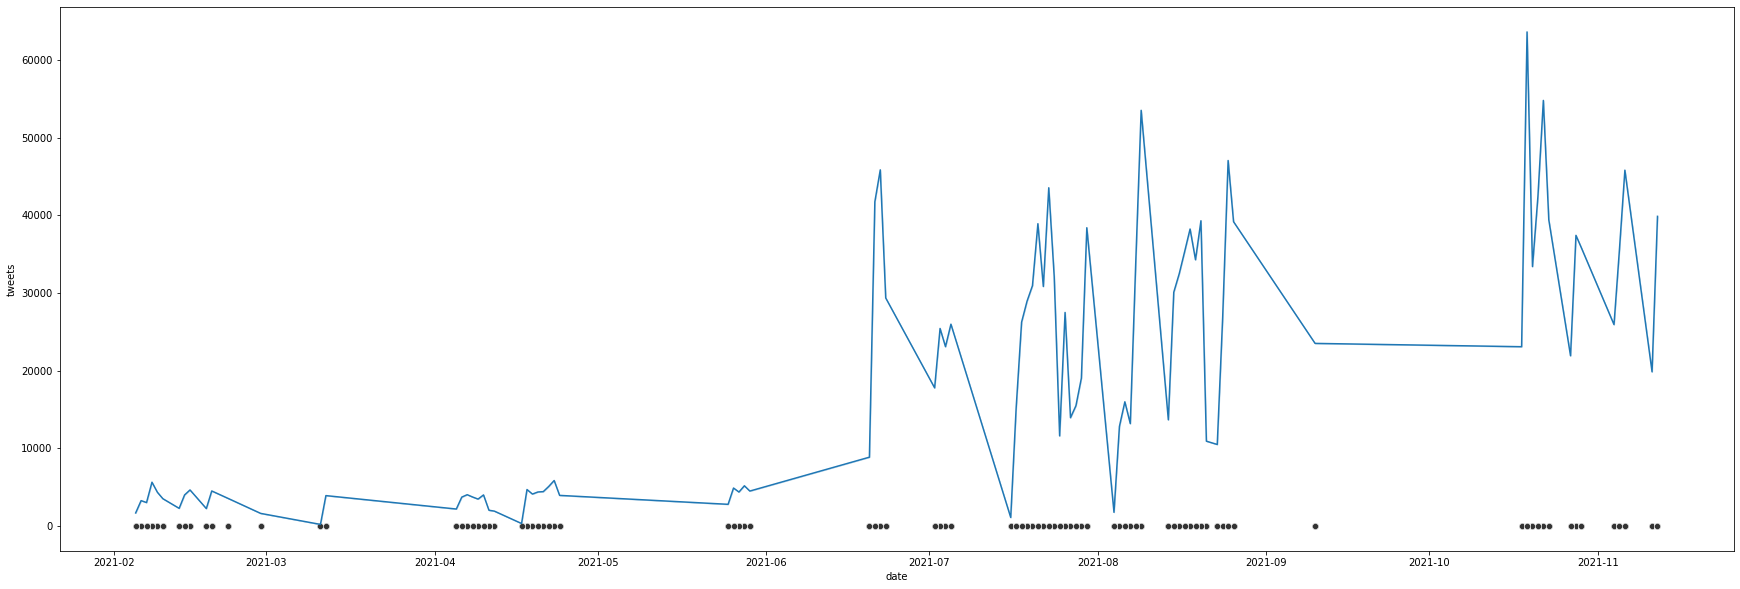

In [453]:
fig, axs = plt.subplots(1, 1, sharex=True, figsize=(30,10))
ax = sns.lineplot(x= df['date'].dt.date, y='tweets', data= df)
sns.scatterplot(x= df_old['date'].dt.date, y='has_tweet', color = '0.2' ,data= df_old, ax=ax)

<AxesSubplot:xlabel='date', ylabel='tweets'>

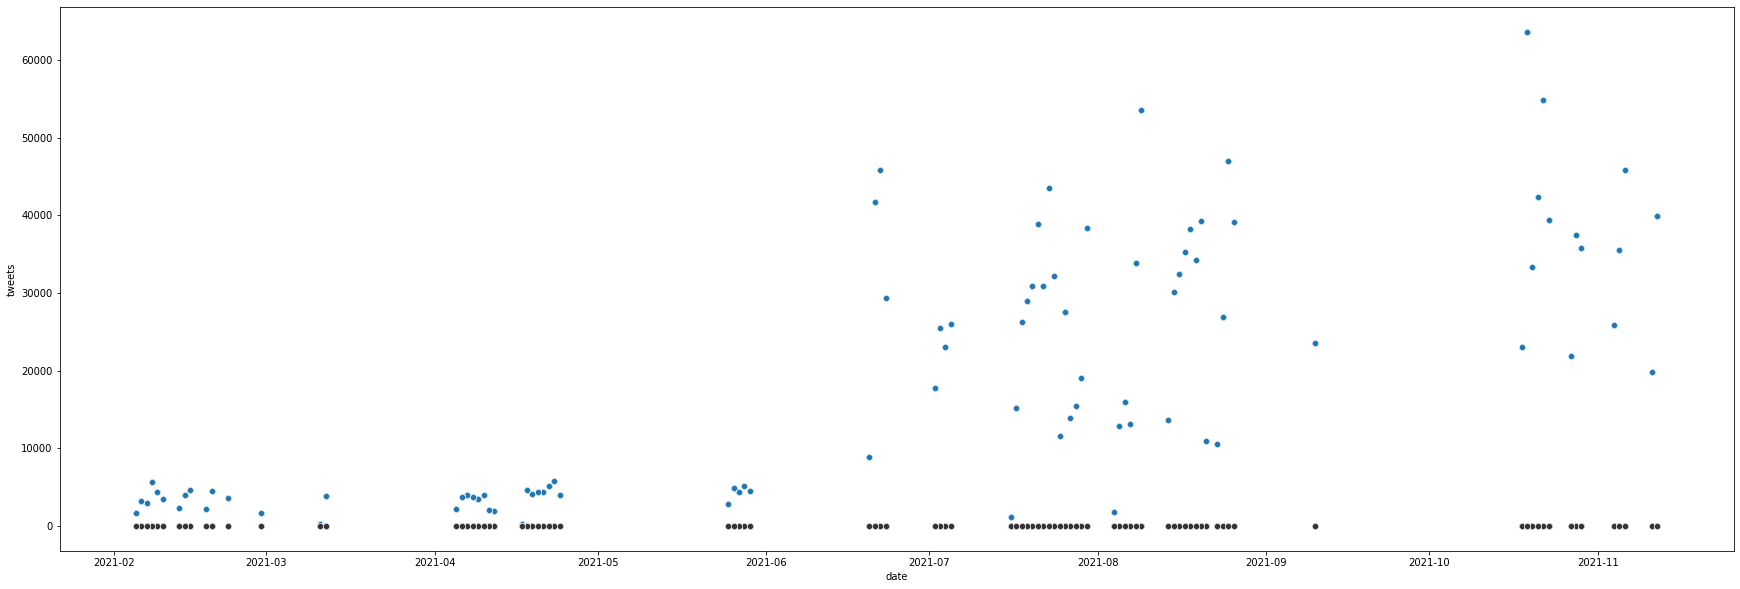

In [458]:
fig, axs = plt.subplots(1, 1, sharex=True, figsize=(30,10))
ax = sns.scatterplot(x= df['date'].dt.date, y='tweets',  data= df)
sns.scatterplot(x= df_old['date'].dt.date, y='has_tweet', color = '0.2' ,data= df_old, ax=ax)

## The dataset has missing data during certain dates, so I don't feel safe to do a linear regression. 
#### The only thing I can do is get a new dataset without missing that many values.

# Natural Language Processing

WIP

In [387]:
df.to_csv('BTC_Tweets_Cleaned.csv')